### import libraries

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
from scipy.stats import fisher_exact
from sklearn.metrics import confusion_matrix
import utility
import importlib
import matplotlib.pyplot as plt
pd.set_option('mode.chained_assignment', None)

##### Read gain data

In [36]:
df = pd.read_excel("../data/yeast_metadata.xlsx", sheet_name="unfiltered_gain")

In [37]:
df

,Position,CHROM,REF,ALT,population_name,G70_ref_counts,G1410_ref_counts,G2640_ref_counts,G5150_ref_counts,G7530_ref_counts,G10150_ref_counts,G70_alt_counts,G1410_alt_counts,G2640_alt_counts,G5150_alt_counts,G7530_alt_counts,G10150_alt_counts,accumulate_gain
0,31,chrVIII,C,A,P3G06,35,31,59,38,42,56,0,0,0,0,11,0,-3.577119
1,34,2-micron,G,T,P1E04,74,104,3,0,0,1,0,217,426,323,156,236,0.392871
2,34,chrII,G,A,P2C06,4,0,1,0,2,1,0,0,0,0,16,12,-4.563850
3,36,chrIX,C,A,P2F11,24,5,39,2,34,2,0,0,0,0,5,0,-11.012777
4,36,chrIX,C,A,P3F11,44,1,38,4,18,2,0,0,0,0,9,0,-11.012777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133533,1525964,chrIV,C,T,P3G10,0,0,0,1,2,0,3,5,12,7,18,0,8.835324
133534,1525964,chrIV,C,T,P3G11,2,0,1,1,0,0,0,0,6,0,4,0,8.835324
133535,1525998,chrIV,T,C,P3B07,0,0,1,1,3,0,2,0,0,1,8,0,-14.496006
133536,1525998,chrIV,T,C,P3B10,0,0,0,4,2,1,0,0,3,2,0,0,-14.496006


##### Read fitness data

In [38]:
df_finess = pd.read_excel("../data/yeast_metadata.xlsx", sheet_name="fitness")
df_finess

,population_name,Plate,Well,Gen70_s_R1,Gen70_s_R2,Gen70_s,Gen70_s_scaled,Gen550_s_R1,Gen550_s_R2,Gen550_s,...,Gen5150_s,Gen5150_s_scaled,Gen7530_s_R1,Gen7530_s_R2,Gen7530_s,Gen7530_s_scaled,Gen10150_s_R1,Gen10150_s_R2,Gen10150_s,Gen10150_s_scaled
0,P1A01,P1,A01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,P1A02,P1,A02,-0.075306,-0.062071,-0.068689,-0.072925,-0.063589,-0.055622,-0.059606,...,0.016666,0.009374,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,P1A03,P1,A03,-0.077027,-0.076459,-0.076743,-0.080979,-0.046321,-0.042535,-0.044428,...,0.000769,-0.006523,0.008259,0.012947,0.010603,0.006367,0.014491,0.011513,0.013002,0.005710
3,P1A04,P1,A04,-0.071582,-0.080952,-0.076267,-0.080503,-0.052351,-0.056217,-0.054284,...,0.011147,0.003855,0.050515,0.048179,0.049347,0.045111,0.032640,0.032965,0.032803,0.025511
4,P1A05,P1,A05,-0.083521,-0.075293,-0.079407,-0.083643,-0.042366,-0.038459,-0.040412,...,0.011189,0.003897,0.027355,0.027544,0.027449,0.023213,0.032051,0.021394,0.026722,0.019430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,P3H08,P3,H08,0.012884,-0.063161,-0.025138,-0.005443,-0.029671,-0.009803,-0.019737,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
284,P3H09,P3,H09,0.000215,-0.061140,-0.030462,-0.010767,-0.052983,-0.030976,-0.041979,...,0.070635,0.114702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
285,P3H10,P3,H10,-0.027629,-0.096806,-0.062218,-0.042522,-0.066732,-0.037109,-0.051921,...,0.048310,0.092378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
286,P3H11,P3,H11,-0.082479,-0.179554,-0.131016,-0.111321,-0.068555,-0.072646,-0.070601,...,0.034874,0.078941,NaN,-0.359102,-0.359102,-0.339407,NaN,NaN,NaN,NaN


##### Read media data

In [39]:
df_media = pd.read_excel("../data/yeast_metadata.xlsx", sheet_name="media")
df_media = df_media.rename(columns={'platewell': 'population_name'})
df_media

,population_name,Plate,Strain
0,P1B02,YPD 30°C,a
1,P1B04,YPD 30°C,a
2,P1B07,YPD 30°C,diploid
3,P1B11,YPD 30°C,alpha
4,P1C02,YPD 30°C,a
...,...,...,...
84,P3G05,SC 37°C,a
85,P3G06,SC 37°C,a
86,P3G09,SC 37°C,diploid
87,P3G10,SC 37°C,diploid


##### calculate sum of allele count across all generation

In [40]:
df["sum of alt AC"] = df['G70_alt_counts'] + df['G1410_alt_counts'] + \
df['G2640_alt_counts'] + df['G5150_alt_counts'] + df['G7530_alt_counts'] + df['G10150_alt_counts']
df

,Position,CHROM,REF,ALT,population_name,G70_ref_counts,G1410_ref_counts,G2640_ref_counts,G5150_ref_counts,G7530_ref_counts,G10150_ref_counts,G70_alt_counts,G1410_alt_counts,G2640_alt_counts,G5150_alt_counts,G7530_alt_counts,G10150_alt_counts,accumulate_gain,sum of alt AC
0,31,chrVIII,C,A,P3G06,35,31,59,38,42,56,0,0,0,0,11,0,-3.577119,11
1,34,2-micron,G,T,P1E04,74,104,3,0,0,1,0,217,426,323,156,236,0.392871,1358
2,34,chrII,G,A,P2C06,4,0,1,0,2,1,0,0,0,0,16,12,-4.563850,28
3,36,chrIX,C,A,P2F11,24,5,39,2,34,2,0,0,0,0,5,0,-11.012777,5
4,36,chrIX,C,A,P3F11,44,1,38,4,18,2,0,0,0,0,9,0,-11.012777,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133533,1525964,chrIV,C,T,P3G10,0,0,0,1,2,0,3,5,12,7,18,0,8.835324,45
133534,1525964,chrIV,C,T,P3G11,2,0,1,1,0,0,0,0,6,0,4,0,8.835324,10
133535,1525998,chrIV,T,C,P3B07,0,0,1,1,3,0,2,0,0,1,8,0,-14.496006,11
133536,1525998,chrIV,T,C,P3B10,0,0,0,4,2,1,0,0,3,2,0,0,-14.496006,5


##### Add allele switch column

In [41]:
df["allele switch"] = df["REF"]+ "->" + df["ALT"]
df.head()

,Position,CHROM,REF,ALT,population_name,G70_ref_counts,G1410_ref_counts,G2640_ref_counts,G5150_ref_counts,G7530_ref_counts,G10150_ref_counts,G70_alt_counts,G1410_alt_counts,G2640_alt_counts,G5150_alt_counts,G7530_alt_counts,G10150_alt_counts,accumulate_gain,sum of alt AC,allele switch
0,31,chrVIII,C,A,P3G06,35,31,59,38,42,56,0,0,0,0,11,0,-3.577119,11,C->A
1,34,2-micron,G,T,P1E04,74,104,3,0,0,1,0,217,426,323,156,236,0.392871,1358,G->T
2,34,chrII,G,A,P2C06,4,0,1,0,2,1,0,0,0,0,16,12,-4.563850,28,G->A
3,36,chrIX,C,A,P2F11,24,5,39,2,34,2,0,0,0,0,5,0,-11.012777,5,C->A
4,36,chrIX,C,A,P3F11,44,1,38,4,18,2,0,0,0,0,9,0,-11.012777,9,C->A


##### Merge gain and media dataset based on population name

In [42]:
df_with_strain_media = pd.merge(df, df_media, on="population_name", how="left")
df_with_strain_media.head()

,Position,CHROM,REF,ALT,population_name,G70_ref_counts,G1410_ref_counts,G2640_ref_counts,G5150_ref_counts,G7530_ref_counts,...,G1410_alt_counts,G2640_alt_counts,G5150_alt_counts,G7530_alt_counts,G10150_alt_counts,accumulate_gain,sum of alt AC,allele switch,Plate,Strain
0,31,chrVIII,C,A,P3G06,35,31,59,38,42,...,0,0,0,11,0,-3.577119,11,C->A,SC 37°C,a
1,34,2-micron,G,T,P1E04,74,104,3,0,0,...,217,426,323,156,236,0.392871,1358,G->T,YPD 30°C,a
2,34,chrII,G,A,P2C06,4,0,1,0,2,...,0,0,0,16,12,-4.563850,28,G->A,SC 30°C,a
3,36,chrIX,C,A,P2F11,24,5,39,2,34,...,0,0,0,5,0,-11.012777,5,C->A,SC 30°C,alpha
4,36,chrIX,C,A,P3F11,44,1,38,4,18,...,0,0,0,9,0,-11.012777,9,C->A,SC 37°C,alpha


In [43]:
df = pd.merge(df, df_finess, on ="population_name", how= "left")

In [44]:
df

,Position,CHROM,REF,ALT,population_name,G70_ref_counts,G1410_ref_counts,G2640_ref_counts,G5150_ref_counts,G7530_ref_counts,...,Gen5150_s,Gen5150_s_scaled,Gen7530_s_R1,Gen7530_s_R2,Gen7530_s,Gen7530_s_scaled,Gen10150_s_R1,Gen10150_s_R2,Gen10150_s,Gen10150_s_scaled
0,31,chrVIII,C,A,P3G06,35,31,59,38,42,...,0.045347,0.089414,0.099258,0.101634,0.100446,0.120141,0.111351,0.090653,0.101002,0.145069
1,34,2-micron,G,T,P1E04,74,104,3,0,0,...,0.013373,0.006081,0.043559,0.045482,0.044520,0.040284,0.048417,0.035738,0.042077,0.034785
2,34,chrII,G,A,P2C06,4,0,1,0,2,...,0.014815,0.009800,0.036075,0.031154,0.033615,0.036690,0.047983,0.031054,0.039519,0.034504
3,36,chrIX,C,A,P2F11,24,5,39,2,34,...,0.015126,0.010111,0.043794,0.025637,0.034715,0.037791,0.057143,0.047074,0.052108,0.047093
4,36,chrIX,C,A,P3F11,44,1,38,4,18,...,0.017775,0.061842,0.070586,0.065034,0.067810,0.087505,0.074825,0.063274,0.069050,0.113117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133533,1525964,chrIV,C,T,P3G10,0,0,0,1,2,...,0.059369,0.103436,0.108584,0.103108,0.105846,0.125541,0.093853,0.097270,0.095562,0.139629
133534,1525964,chrIV,C,T,P3G11,2,0,1,1,0,...,0.014649,0.058716,0.048681,0.045841,0.047261,0.066956,0.063762,0.047869,0.055816,0.099883
133535,1525998,chrIV,T,C,P3B07,0,0,1,1,3,...,0.013698,0.057765,0.117451,0.091521,0.104486,0.124182,0.098883,0.108365,0.103624,0.147691
133536,1525998,chrIV,T,C,P3B10,0,0,0,4,2,...,0.140108,0.184175,0.161332,0.126551,0.143941,0.163637,0.217805,0.217780,0.217793,0.261860


In [45]:
# pd.Series(i).str.extract(r'(\d+)').astype(int).values

##### Convert the data to consider the mutation of all generation of every population format

In [46]:
import re

all_mutation = pd.DataFrame()
gen_list = ['G70_alt_counts', 'G1410_alt_counts', 'G2640_alt_counts', 'G5150_alt_counts', 'G7530_alt_counts',
            'G10150_alt_counts']

def extract_integer_from_string(s):

    import re

    # Sample string
    # my_string = "G10150_ref_counts"

    result = re.search(r'\d+', s)

    # Check if there is a match and extract the integer
    if result:
        extracted_integer = int(result.group())
        print(extracted_integer)
    else:
        print("No integer found in the string.")

    return extracted_integer



for i in gen_list:
    new_df_tmp = pd.DataFrame()
    new_df = df[df.loc[:, i]!=0]
    new_df_tmp = new_df[['CHROM', 'Position', 'allele switch', 'population_name']]
    new_df_tmp.loc[:, "generation"] = i
    new_df_tmp.loc[:, "AG"] = new_df.loc[:, "accumulate_gain"]
    new_df_tmp.loc[:, "allele count"] = new_df.loc[:, i]
    # use the filter() function to filter out non-numeric elements from the list
    int_gen = extract_integer_from_string(i)
    
    # use a list comprehension to convert the remaining elements to integers
    # res = [int(s) for s in res][0]
    col = "Gen"+ str(int_gen)+ "_s_scaled"
    new_df_tmp.loc[:, "fitness"] = new_df.loc[:, col]

    # Gen5150_s_scaled
    # print(int_gen)

    all_mutation = pd.concat([all_mutation, new_df_tmp], axis = 0)
    
all_mutation.reset_index(inplace=True, drop=True)
all_mutation['generation_number'] = all_mutation['generation'].str.extract(r'(\d+)').astype(int)

70
1410
2640
5150
7530
10150


In [47]:
all_mutation

,CHROM,Position,allele switch,population_name,generation,AG,allele count,fitness,generation_number
0,chrX,66,C->T,P1C11,G70_alt_counts,6.067923,7,-0.024371,70
1,chrX,69,T->A,P1C11,G70_alt_counts,-4.705100,7,-0.024371,70
2,chrX,73,C->T,P1C11,G70_alt_counts,3.963808,7,-0.024371,70
3,chrX,73,C->T,P2B04,G70_alt_counts,3.963808,5,-0.095073,70
4,chrX,74,T->C,P1B02,G70_alt_counts,-2.479826,5,-0.065863,70
...,...,...,...,...,...,...,...,...,...
500926,chrIV,1525964,C->T,P3D10,G10150_alt_counts,8.835324,4,0.152402,10150
500927,chrIV,1525964,C->T,P3D11,G10150_alt_counts,8.835324,2,0.125363,10150
500928,chrIV,1525964,C->T,P3E08,G10150_alt_counts,8.835324,2,0.146029,10150
500929,chrIV,1525964,C->T,P3F09,G10150_alt_counts,8.835324,6,0.151053,10150


In [48]:
all_mutation.isna().any() # The all_mutation dataframe contain generation and population wise accumulated gain

CHROM                False
Position             False
allele switch        False
population_name      False
generation           False
AG                   False
allele count         False
fitness              False
generation_number    False
dtype: bool

##### prepare pivot table for population name vs generation for accumulated gain when using median as aggregate function 

In [49]:
pivot_table_median = all_mutation.pivot_table(index='population_name', columns='generation', aggfunc='median', values = "AG")

In [50]:
pivot_table_median

generation,G10150_alt_counts,G1410_alt_counts,G2640_alt_counts,G5150_alt_counts,G70_alt_counts,G7530_alt_counts
population_name,,,,,,
P1B02,-1.016953,-1.346143,-1.208955,-1.062441,-1.594079,-1.118219
P1B03,-1.157531,-1.253406,-1.296853,-1.431549,-1.826906,-1.178284
P1B04,-0.902789,-0.796355,-1.124722,-0.919613,-1.413609,-0.912627
P1B07,-1.496398,-1.610997,-1.525015,-1.571824,-1.604118,-1.614365
P1B11,-0.919613,-1.208955,-1.604814,-1.021440,-1.610997,-1.123226
...,...,...,...,...,...,...
P3G05,-0.411016,-1.509460,-1.283271,-1.345582,-1.872666,-0.476541
P3G06,-0.692120,-1.310846,-1.265002,-0.963192,-1.377809,-0.910397
P3G09,-1.007506,-1.343901,-1.496278,-1.345582,-1.788013,-1.265002


##### plot heatmap for population name vs generation for accumulated gain when using median as aggregate function

###### It shows the heatmap of median accumulated gain, where the row indicate a population and column indicate generation.

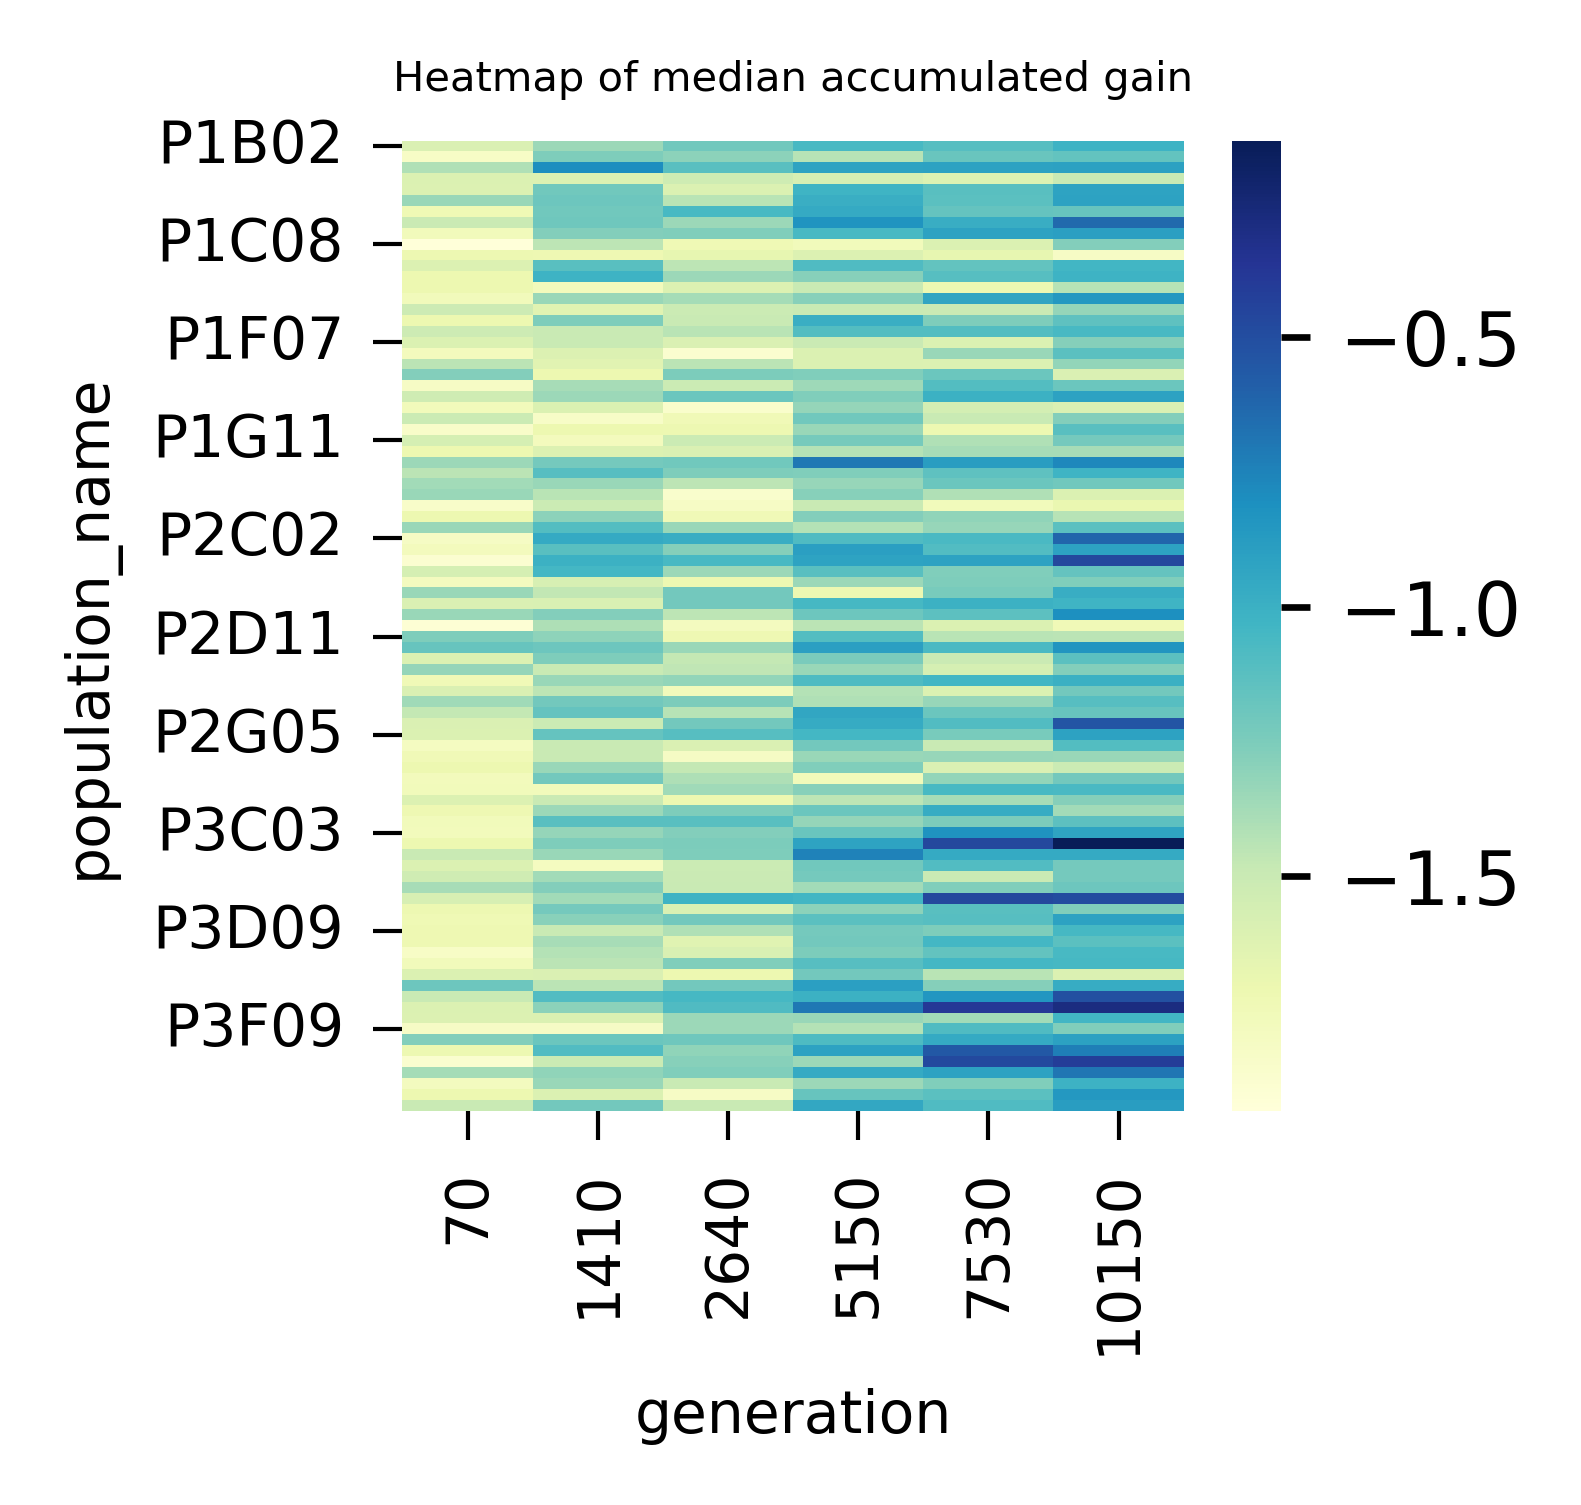

In [51]:
fig, ax = plt.subplots(1, 1, dpi = 600, figsize =(2.1, 2.1))
heatmap_median = sns.heatmap(pivot_table_median[['G70_alt_counts', 'G1410_alt_counts', 'G2640_alt_counts', 'G5150_alt_counts', 'G7530_alt_counts', 'G10150_alt_counts']], cmap='YlGnBu', ax=ax, label="median", cbar=True)
ax = utility.custom_figure_axis(ax, fontsize=7, show_ticks = True)
ax.set_title("Heatmap of median accumulated gain", fontsize=5)
custom_labels = ["70", "1410", "2640", "5150", "7530", "10150"]
ax.set_xticklabels(custom_labels)
cbar = heatmap_median.collections[0].colorbar
cbar.ax.tick_params(labelsize=9)
plt.savefig("../figure/yeast median of accumulated gain in population vs generation.pdf", dpi = 600, bbox_inches="tight")

##### Allele switch vs accumulated gain (unique mutation)

###### It shows the box plot of accumulated gain for every possible allele change.

In [52]:
allele_switch_group1 = ['C->G','A->C','A->T','T->G','G->C','T->A', 'C->A',  'G->T'] # Transversion group
allele_switch_group2 = ['G->A', 'C->T', 'A->G','T->C'] # Transition group
df_allele_switch_group1 = df[df["allele switch"].isin(allele_switch_group1)]
df_allele_switch_group2 = df[df["allele switch"].isin(allele_switch_group2)]
formatted_p = "{:.2e}".format(utility.man_whiteney(df_allele_switch_group2['accumulate_gain'], df_allele_switch_group1['accumulate_gain']))

p_value = utility.man_whiteney(df_allele_switch_group2['accumulate_gain'], df_allele_switch_group1['accumulate_gain'])
print("The one sided greater p value between Transition group and Transversion group is : ", p_value)

The one sided greater p value between Transition group and Transversion group is :  1.0


/home/abhishekh/anaconda3/envs/amr/lib/python3.10/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


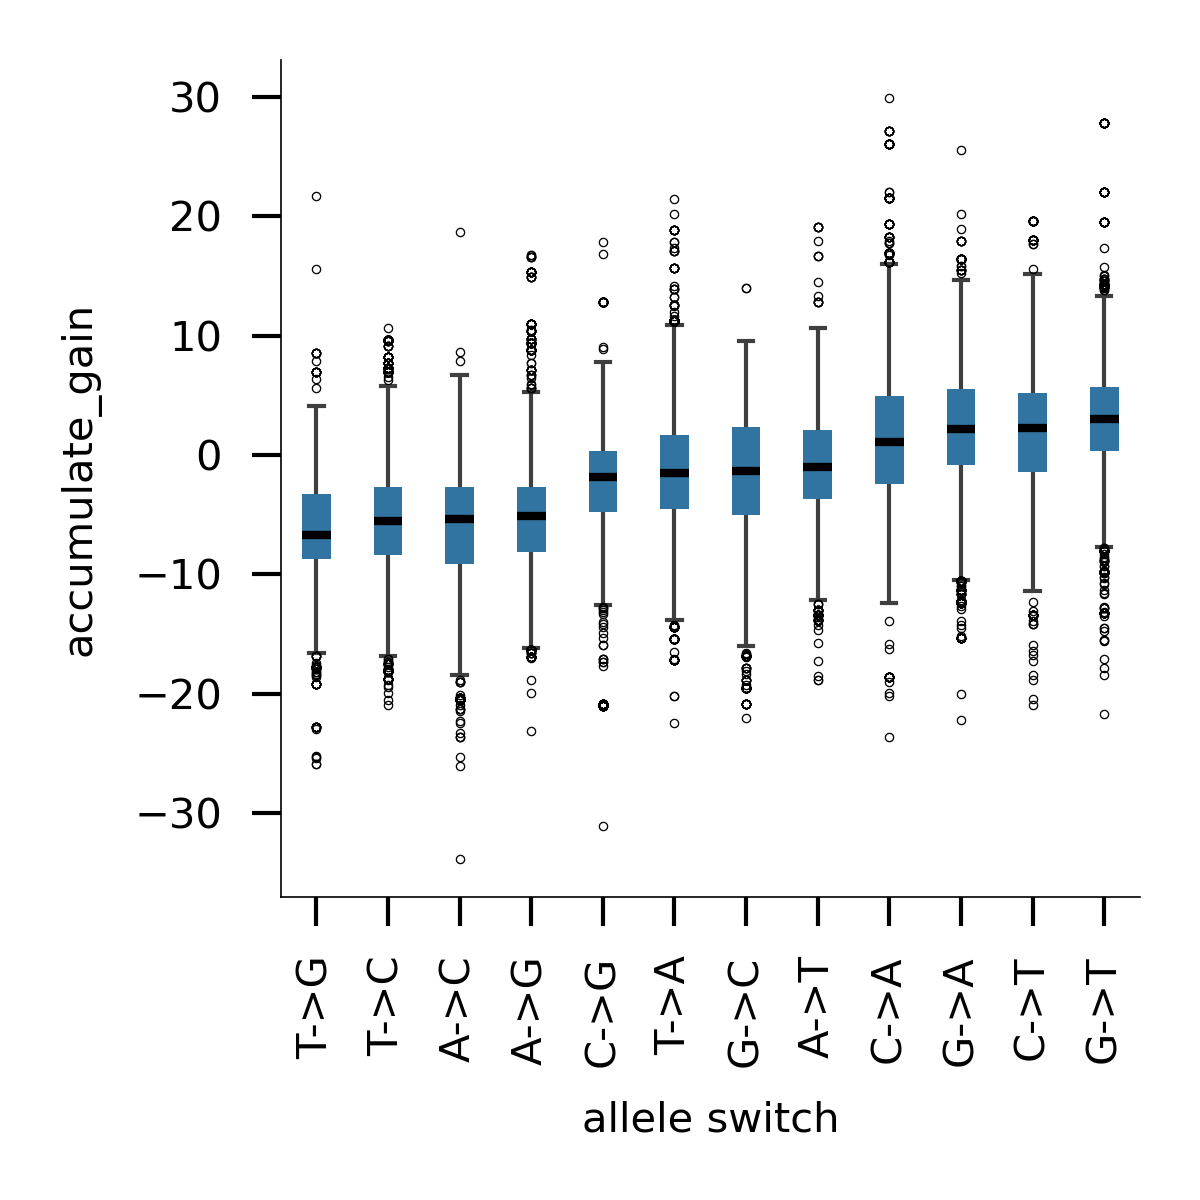

In [53]:
fig, ax = plt.subplots(1, 1, dpi = 600, figsize =(2.1,2.1))
ax = utility.box_plot(data= df, x = 'allele switch', y = 'accumulate_gain', ax = ax)
ax = utility.custom_figure_axis(ax, fontsize=5, show_ticks = True)
# ax.set_title("Accumulated gain vs Allele change in yeast (unique)", fontsize=5)
offset=0.1
# formatted_p = "{:.2e}".format(utility.man_whiteney(df_allele_switch_group2['accumulate_gain'], df_allele_switch_group1['accumulate_gain']))
# ax.text((max(ax.get_xlim()) - offset), (max(ax.get_ylim()) - offset), "One sided p:" + formatted_p, fontsize=5, color='red', ha='right', va='top')
# ax.set_xlabel(None)
# ax.set_ylabel(None)
plt.tight_layout()
plt.savefig("../figure/unfiltered accumulated gain vs allele change in yeast unique mutation.pdf", dpi = 600, bbox_inches="tight")

##### statistical test

In [54]:
ag_binary = np.where(df[ 'accumulate_gain'] > 0, 1, 0) # binarize the accumulated gain with zero as cut off
ac_binary = np.where(df["sum of alt AC"] > np.median(df["sum of alt AC"]), 1, 0) # binarize the sum of allele count with median as cut off
cm = confusion_matrix(ac_binary, ag_binary)

confusion_df = pd.DataFrame(cm, columns=['g_neg', 'g_pos'], index=['ac_low', 'ac_high']) # prepare the confusion matrix

odds_ratio, p_value_fisher = fisher_exact(np.array(confusion_df))

print("The confusion matrix is: \n", confusion_df)
# print("The ratio of High allele count/ low allele count for low accumulated gain is: ", cm[1][0]/cm[0][0])
# print("The ratio of High allele count/ low allele count for high accumulated gain is: ", cm[1][1]/cm[0][1])
# print("The ratio of pos gain/ neg gain for low allele count is: ", cm[0][1]/cm[0][0])
# print("The ratio of pos gain/ neg gain for high allele count is: ", cm[1][1]/cm[1][0])
print("Fisher's exact test p-value:", p_value_fisher)
# print("Hypergeometric test p-value:", p_value_hypergeom)

The confusion matrix is: 
          g_neg  g_pos
ac_low   40477  27694
ac_high  36859  28508
Fisher's exact test p-value: 2.18424819264883e-28


##### Median accumulated gain vs generation

###### It shows the line plot of median of accumulated gain vs generation where the the shaaded region indicate 95% confidence interval.

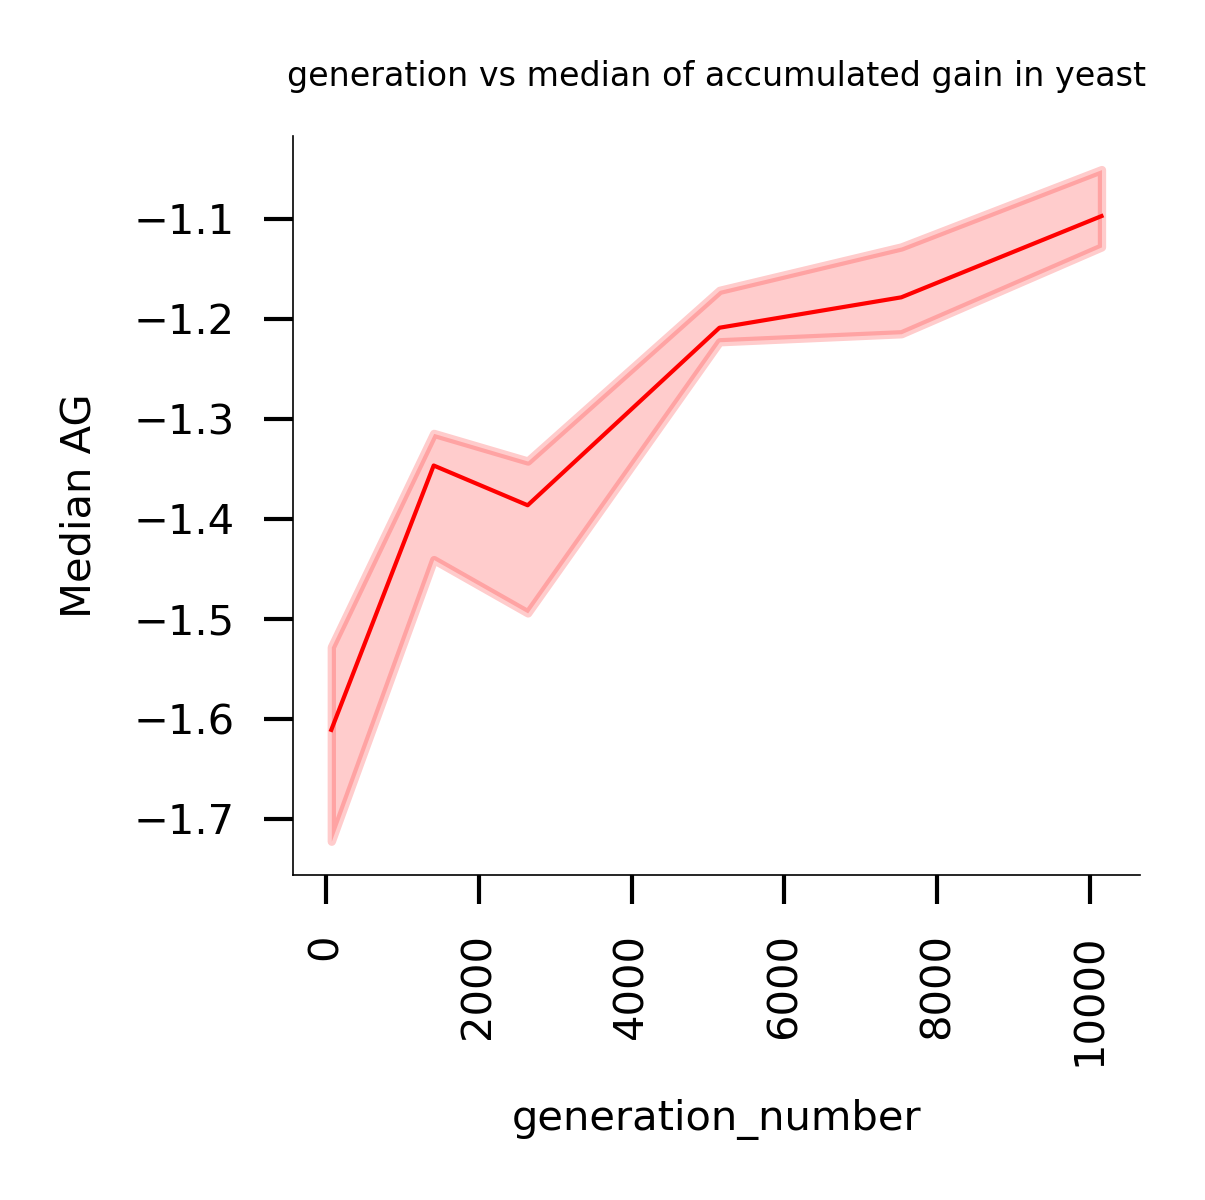

In [55]:
fig, ax = plt.subplots(1, 1 , dpi = 600, figsize = (2.1, 2.1))
ax = sns.lineplot(data = all_mutation, x = "generation_number", y = "AG", ax = ax, color="red", lw=0.5, estimator='median')
ax = utility.custom_figure_axis(ax, fontsize=5, show_ticks = True)
ax.set_ylabel("Median AG")
ax.set_title("generation vs median of accumulated gain in yeast", fontsize=4)
plt.tight_layout()
plt.savefig("../figure/generation vs median ag in yeast.pdf", dpi = 600)

##### merge all_mutation with media data

In [56]:
all_mutation_with_media = pd.merge(all_mutation, df_media, on = 'population_name', how='left')
all_mutation_with_media

,CHROM,Position,allele switch,population_name,generation,AG,allele count,fitness,generation_number,Plate,Strain
0,chrX,66,C->T,P1C11,G70_alt_counts,6.067923,7,-0.024371,70,YPD 30°C,alpha
1,chrX,69,T->A,P1C11,G70_alt_counts,-4.705100,7,-0.024371,70,YPD 30°C,alpha
2,chrX,73,C->T,P1C11,G70_alt_counts,3.963808,7,-0.024371,70,YPD 30°C,alpha
3,chrX,73,C->T,P2B04,G70_alt_counts,3.963808,5,-0.095073,70,SC 30°C,a
4,chrX,74,T->C,P1B02,G70_alt_counts,-2.479826,5,-0.065863,70,YPD 30°C,a
...,...,...,...,...,...,...,...,...,...,...,...
500926,chrIV,1525964,C->T,P3D10,G10150_alt_counts,8.835324,4,0.152402,10150,SC 37°C,diploid
500927,chrIV,1525964,C->T,P3D11,G10150_alt_counts,8.835324,2,0.125363,10150,SC 37°C,alpha
500928,chrIV,1525964,C->T,P3E08,G10150_alt_counts,8.835324,2,0.146029,10150,SC 37°C,diploid
500929,chrIV,1525964,C->T,P3F09,G10150_alt_counts,8.835324,6,0.151053,10150,SC 37°C,diploid


In [57]:
# all_mutation_with_media

##### Divide the allele count in quantile wise accumulated gain (Duplicate mutation)

In [58]:
lst_quantile_accumulated_gain_vs_allele, lst_quantile_accumulated_gain_vs_allele_only, lst_quantile_accumulated_gain_vs_allele_median =  utility.return_data_quantile_wise(all_mutation, column_name ="AG")
ag_quantile_wise_allele_count = utility.return_quantile_wise_allele_count(lst_quantile_accumulated_gain_vs_allele, column_name="AG", ignore_label_column =True)

##### Box plot of log10(AC) median vs quantile of acumulated gain (Duplicate mutation)

###### The top figure shows the box plot of log10(Allele count) vs quantile wise accumulated gain. The quantile of AG is formed with the step size of 5%. The buttom figure shows the median of log10(AC) vs quantile of AG (5% step size). The shaded area indicate the 95% confidence interval.

/home/abhishekh/anaconda3/envs/amr/lib/python3.10/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(-0.4166666666666785, 0.5, 'Median of log10(AC)')

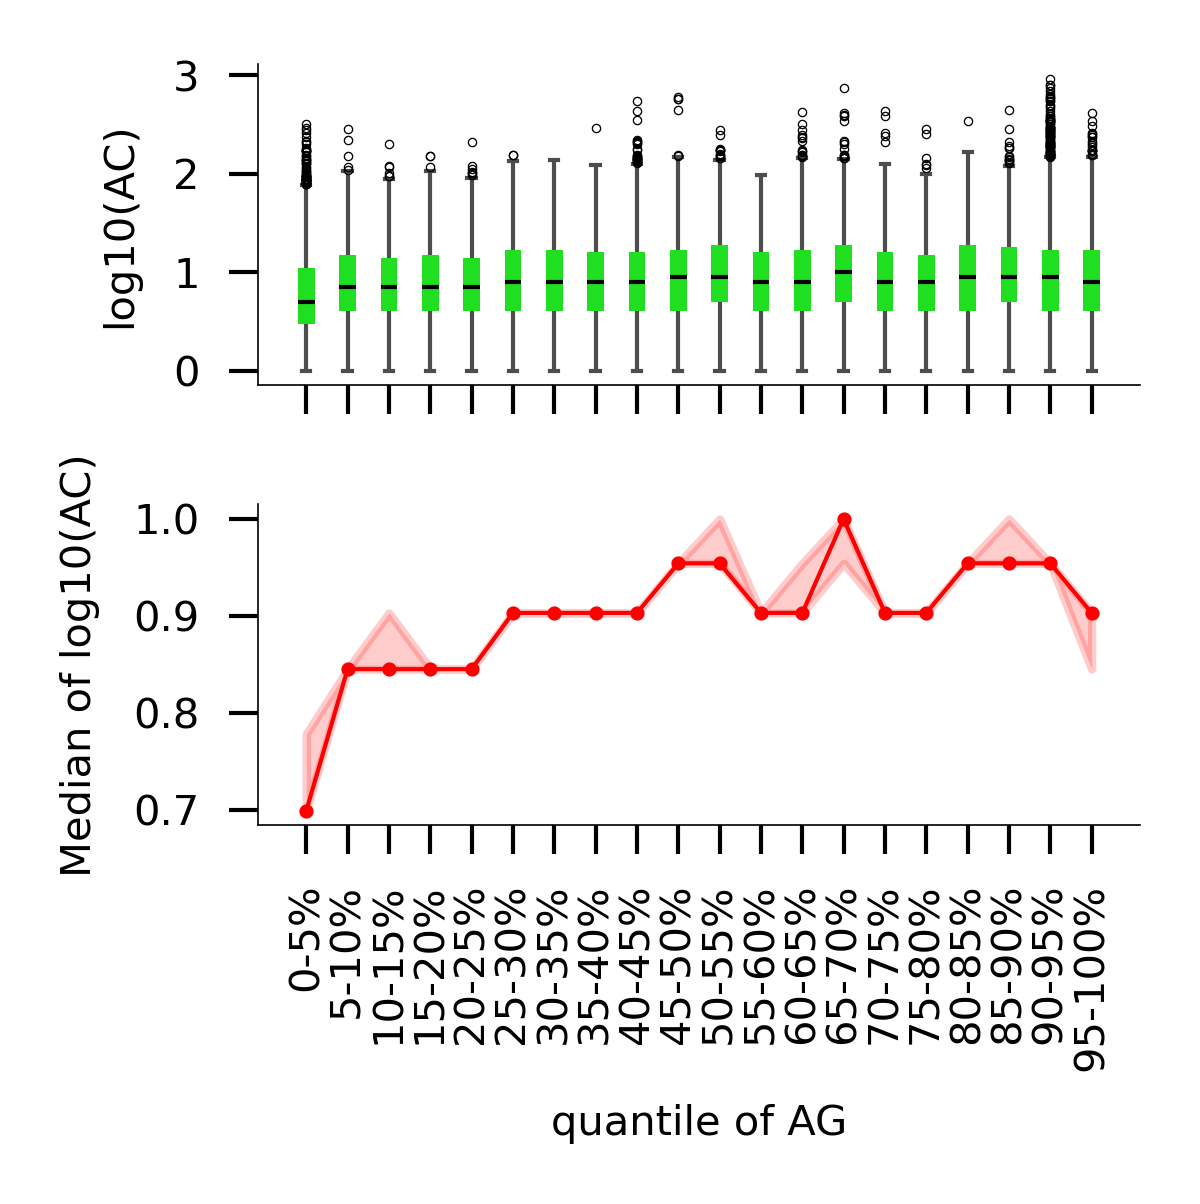

In [59]:
fig, ax = plt.subplots(2, 1 , dpi = 600, figsize = (2.1, 2.1), sharex=True)
ax = utility.plot_ac_vs_column(ax=ax, data = ag_quantile_wise_allele_count, lst_quantile_dataframe_column_name_median = lst_quantile_accumulated_gain_vs_allele_median, show_ticks = True, fontsize=5, column_name = "AG")
# ax[0].set_title("log10(AC) vs quantile of AG", fontsize=5)
# formatted_p = utility.return_quantile_wise_pvalue(lst_quantile_accumulated_gain_vs_allele);
# ax[0].text((max(ax[0].get_xlim()) - offset), (max(ax[0].get_ylim()) - offset), "One sided p:" + formatted_p, fontsize=3, color='red', ha='right', va='top')
ax[0].set_yticks(np.arange(0, 3.1, 1))
ax[1].set_yticks(np.arange(0.7, 1, 0.1))
ax[1].set_ylabel("Median of log10(AC)")
# plt.savefig("unfiltered yeast log10(AC) vs quantile wise AG lineplot.pdf", dpi = 600, bbox_inches="tight")

##### The median line plot of accumulated gain vs strain for different plates (Unique mutation)

/home/abhishekh/anaconda3/envs/amr/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/abhishekh/anaconda3/envs/amr/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/abhishekh/anaconda3/envs/amr/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


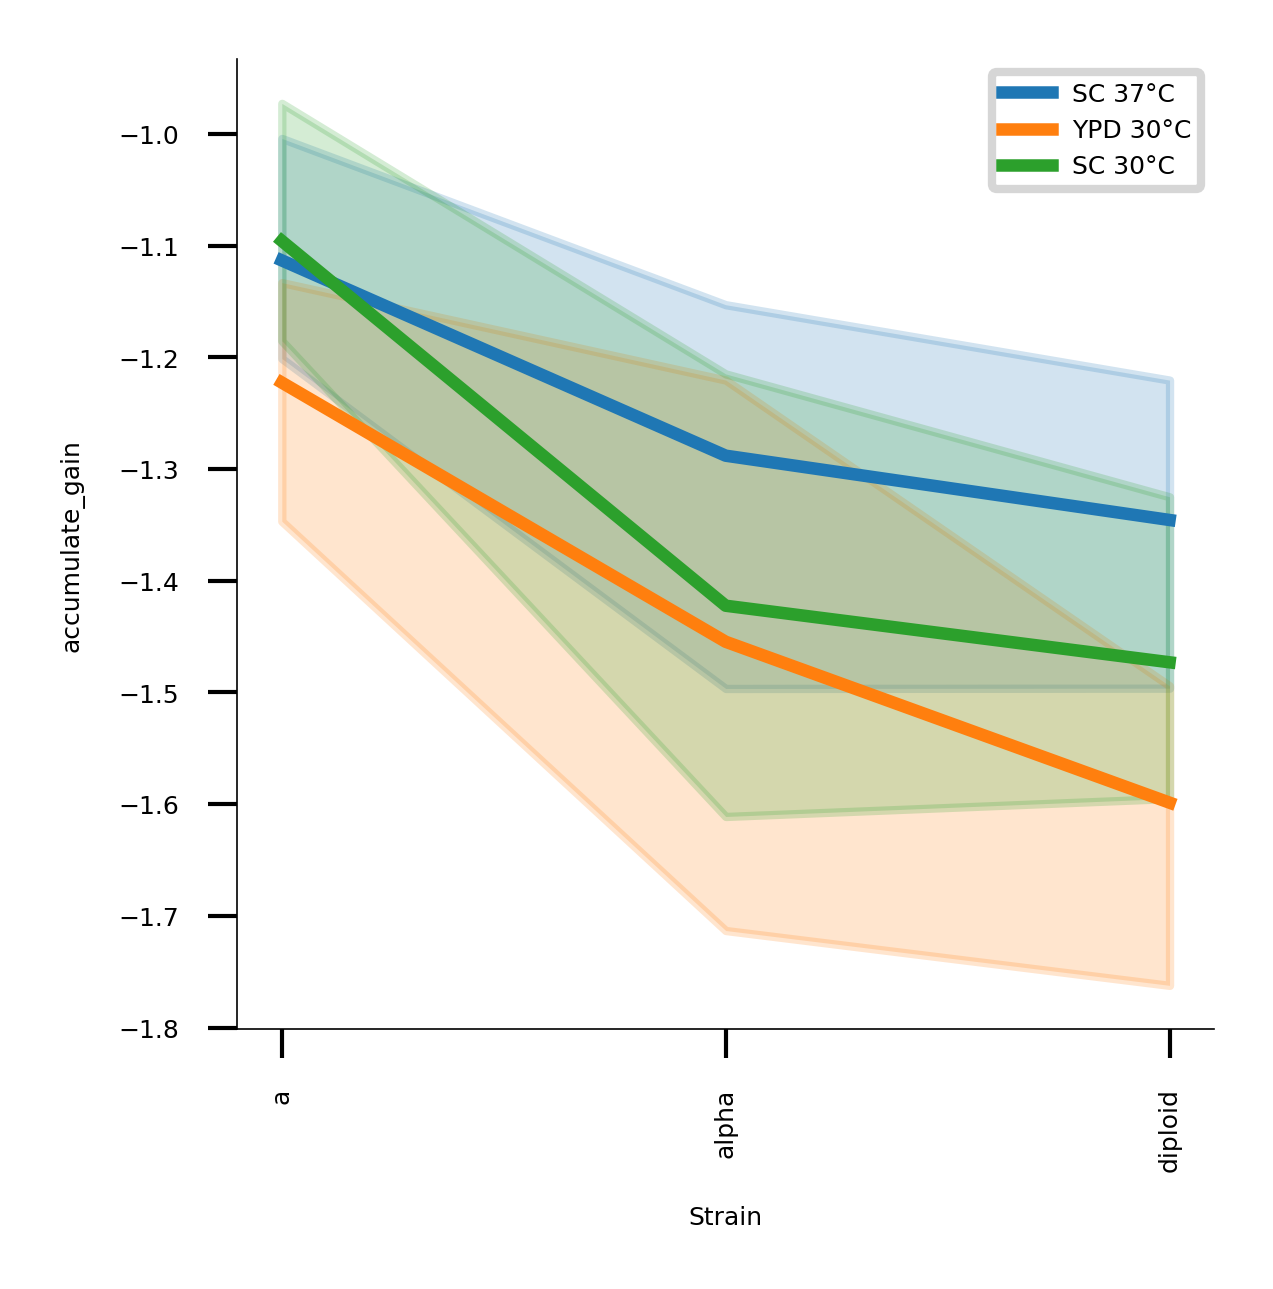

In [60]:
fig, ax = plt.subplots(1, 1 , dpi = 600, figsize = (2.1, 2.1), sharex=True)
sns.lineplot(df_with_strain_media, y =  'accumulate_gain', x = 'Strain', hue = 'Plate', estimator='median',ax=ax);
ax = utility.custom_figure_axis(ax, fontsize=3, show_ticks = True);
ax.legend(ncol = 1, fontsize = 3)
plt.savefig("../figure/Median AG on vs strain with plate as hue in yeast.pdf", dpi = 600)

In [82]:


def plot_scatter(data:pd.DataFrame(),x_column, y_column, ax, logy=False):
    
    """
        Plot scatter plots for mutator, non-mutator, and overall populations.
    
        Parameters:
        - data (pd.DataFrame): Input DataFrame containing the data.
        - x_column (str): Name of the column for the x-axis.
        - y_column (str): Name of the column for the y-axis.
        - logy (bool, optional): If True, apply log10 transformation to y-axis. Default is True.
        
        Returns:
        - None
        
        Note:
        - The function generates scatter plots for overall populations
          based on the specified x_column and y_column.

    """
    
    import matplotlib.pyplot as plt
    import seaborn as sns
    from scipy.stats import spearmanr

    data = data.copy()

    all_population_combined_median  = utility.return_median_data_gen_wise(data, x_column=x_column, y_column=y_column)

    # print(all_population_combined_median)

    norm = plt.Normalize(all_population_combined_median['generation_number'].min(), all_population_combined_median['generation_number'].max())
    sm = plt.cm.ScalarMappable(cmap="mako", norm=norm)
    y_updated = "median "+ y_column
    x_updated = "median "+ x_column

    if logy:
        y_updated = "log10(median " + y_column + ")"
        all_population_combined_median[y_updated] = np.log10(all_population_combined_median["median "+ y_column])

    ax = sns.scatterplot(all_population_combined_median, x = x_updated, y = y_updated, hue="generation_number",ax= ax, legend=True, s = 10, palette='mako')

    offset = 0

    # formatted_correlation_mutator = "{:.2e}".format(all_population_combined_median[x_updated].corr(all_population_combined_median[y_updated]))
    # ax.text((max(ax.get_xlim()) - offset), (max(ax.get_ylim()) - offset), "Corr:" + formatted_correlation_mutator, fontsize=5, color='red', ha='right', va='top')

    all_spearman_corr = "{:.3e}".format(spearmanr(all_population_combined_median[x_updated], all_population_combined_median[y_updated])[0])
    all_spearman_p = "{:.3e}".format(spearmanr(all_population_combined_median[x_updated], all_population_combined_median[y_updated])[1])
    ax.text((max(ax.get_xlim()) -100* offset), (max(ax.get_ylim()) - offset), "Corr:" + str(all_spearman_corr) + "| p- value: " + str(all_spearman_p), fontsize=3, color='black', ha='right', va='top')

    ax = utility.custom_figure_axis(ax, fontsize=5, show_ticks = True, rotation=0)
    # ax[i].set_ylabel("log10(Median AC)")

    ax.get_legend().remove()
    # ax.figure.colorbar(sm, ax=ax)
    # cbar = ax.collections[0].colorbar
    # cbar.ax.yaxis.set_tick_params(labelsize=3)

    # ax.figure.colorbar(sm)

    plt.tight_layout()


    return ax #mutator_population_combined_median, non_mutator_population_combined_median, all_population_combined_median



##### plot median AG vs log10(median allele count)

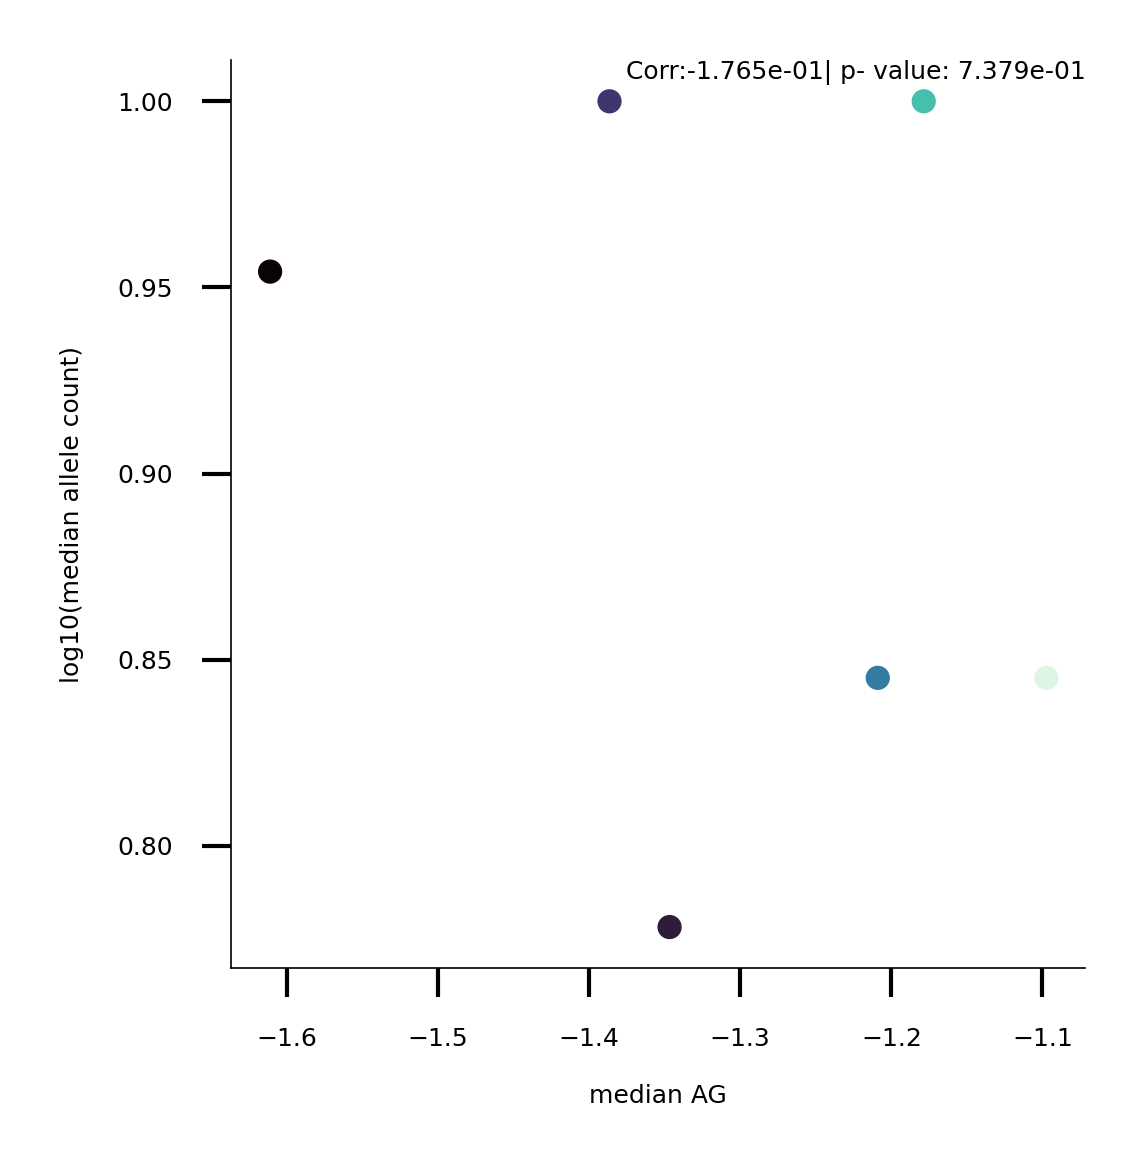

In [83]:
fig, ax = plt.subplots(1,  1, dpi = 600, figsize = (2.1, 2.1), sharex=True)
ax=plot_scatter(all_mutation,  x_column = "AG", y_column = "allele count", ax=ax,  logy=True)
ax = utility.custom_figure_axis(ax, fontsize=3, show_ticks = True, rotation=0)
plt.savefig("../figure/Yeast ag vs generation scatter plot with color bar.pdf", dpi = 600)

##### Median fitness, median AG vs generation

In [63]:
generation_wise_median_fitness = all_mutation.groupby(["generation_number"])["fitness"].median().reset_index()
generation_wise_median_ag = all_mutation.groupby(["generation_number"])["AG"].median().reset_index()


In [64]:
print("The correlation coefficient between median AG and median fitness is : ", generation_wise_median_fitness["fitness"].corr(generation_wise_median_ag["AG"]))

The correlation coefficient between median AG and median fitness is :  0.9635469830202357


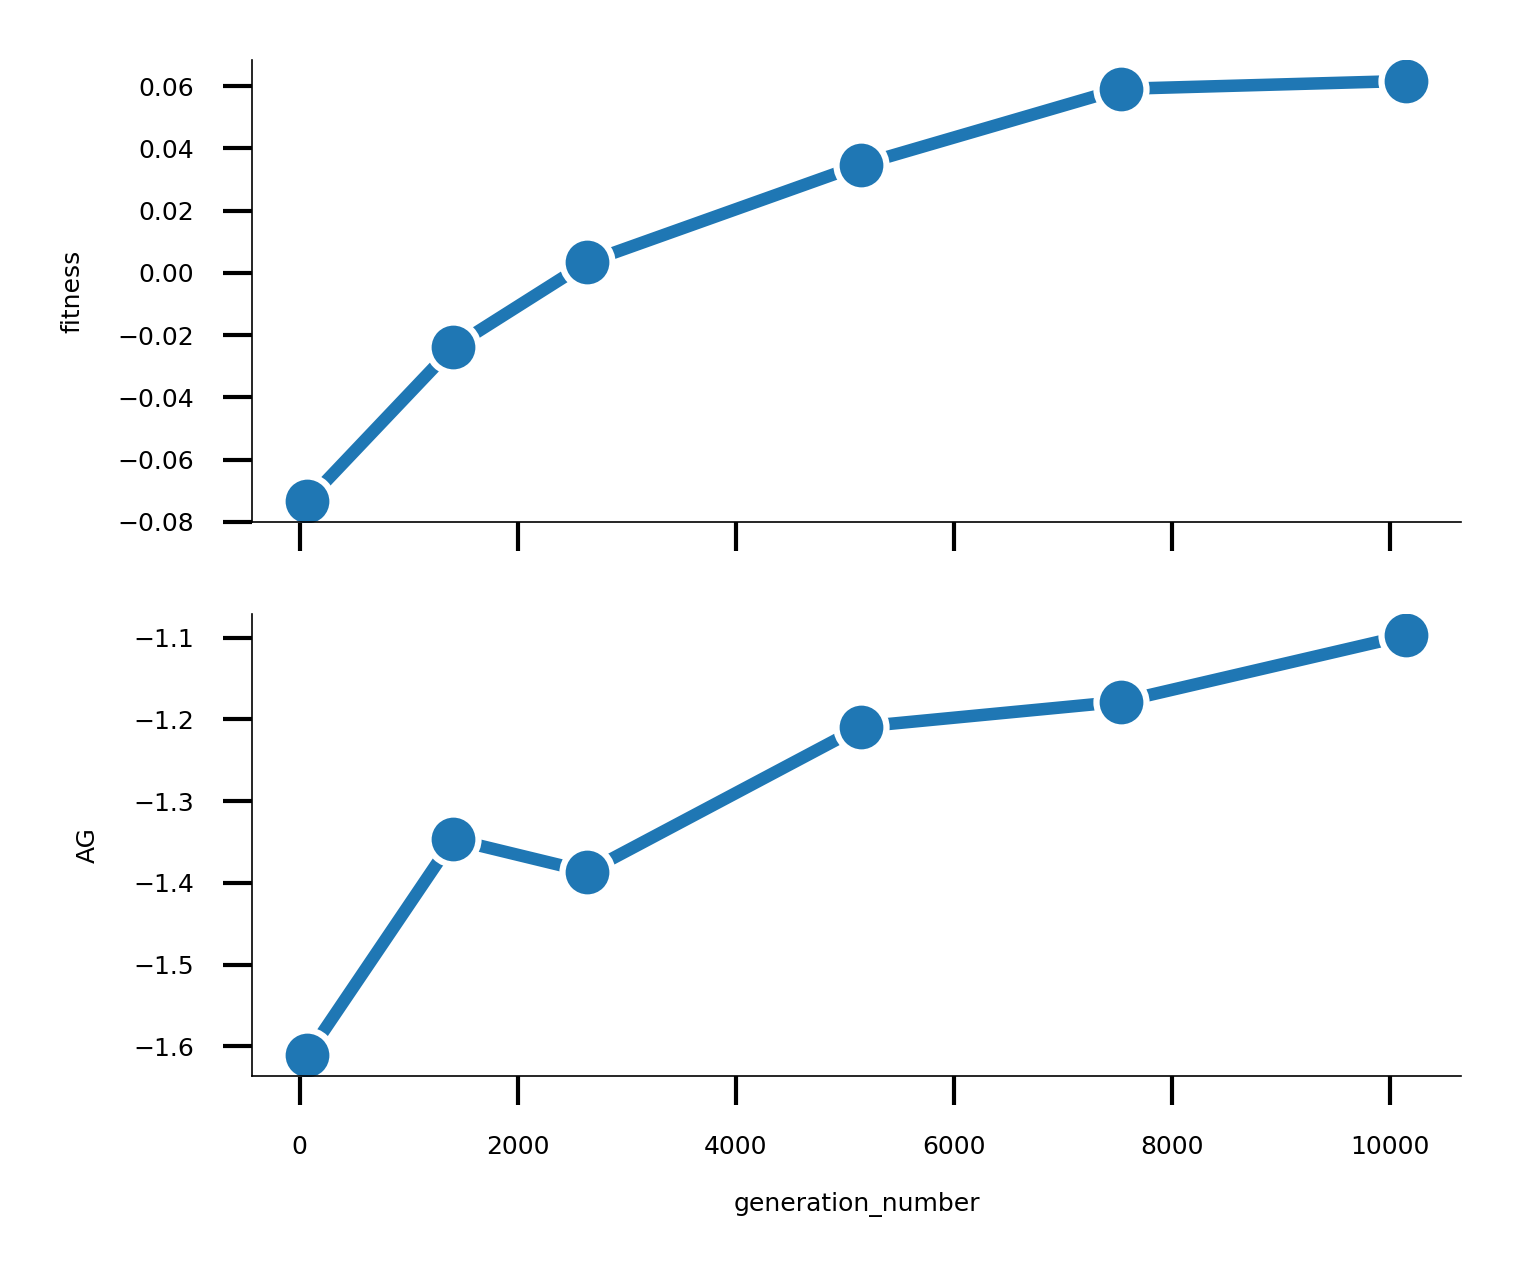

In [65]:
fig, ax = plt.subplots(2,  1, dpi = 600, figsize = (2.6, 2.2), sharex=True)
sns.lineplot(generation_wise_median_fitness, x= "generation_number", y = "fitness", ax=ax[0], marker = "o")
sns.lineplot(generation_wise_median_ag, x= "generation_number", y = "AG", ax=ax[1], marker = "o")
ax[0] = utility.custom_figure_axis(ax[0], fontsize=3, show_ticks = True, rotation=0)
ax[1] = utility.custom_figure_axis(ax[1], fontsize=3, show_ticks = True, rotation=0)

# plt.suptitle("corr(fitness, ag):" + str(generation_wise_median_fitness["fitness"].corr(generation_wise_median_ag["AG"])), fontsize=4)
# plt.tight_layout()
plt.savefig("../figure/Yeast fitness ag vs generation.pdf", dpi = 600)

##### Median fitness vs median AG with color gradient as generation

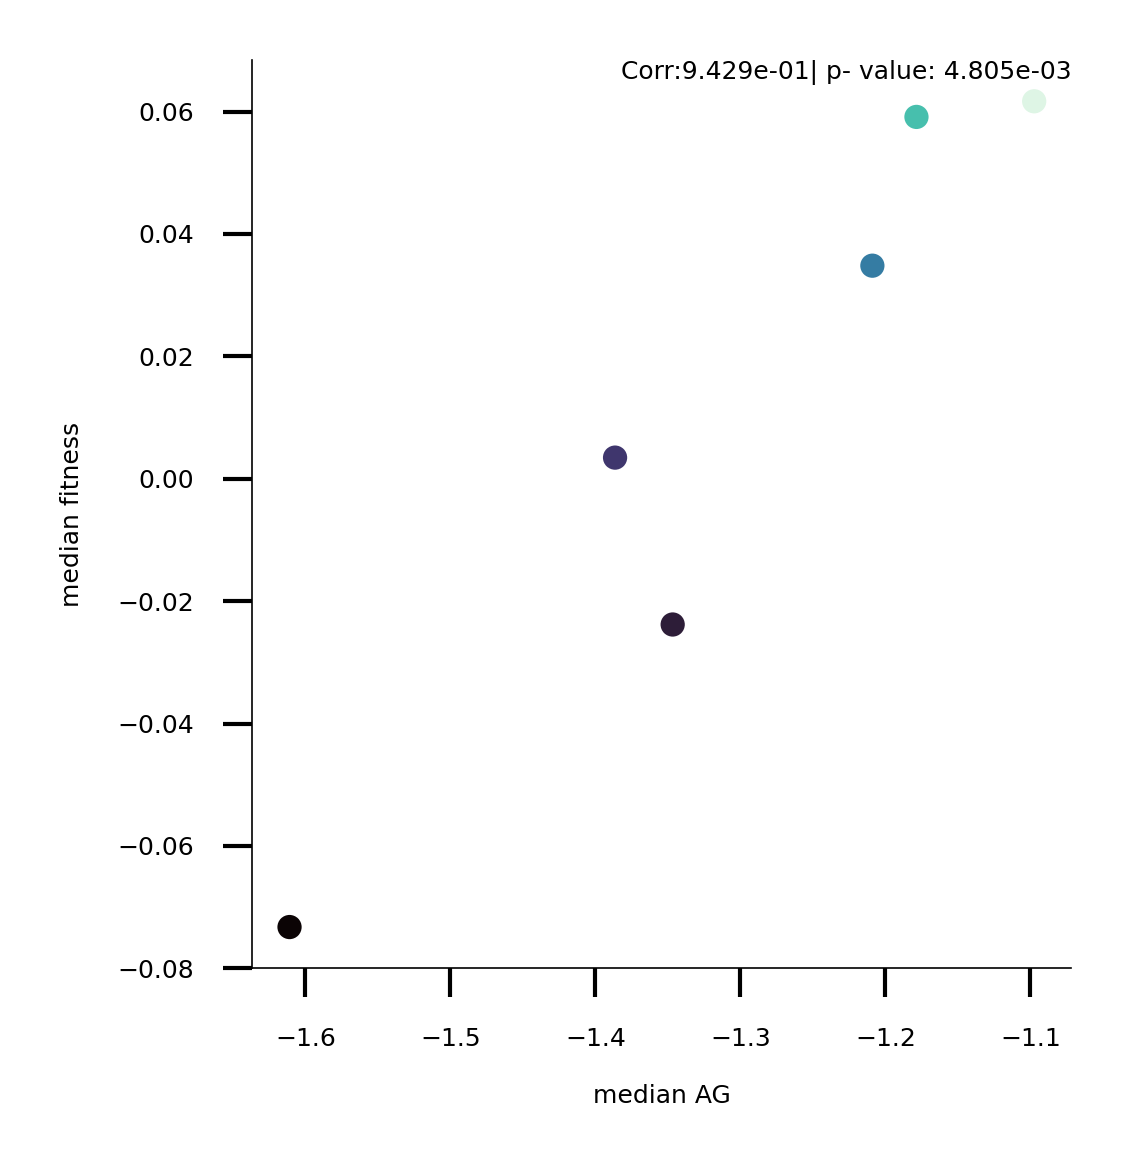

In [89]:
fig, ax = plt.subplots(1,  1, dpi = 600, figsize = (2.1, 2.1), sharex=True)
ax=plot_scatter(all_mutation,  x_column = "AG", y_column = "fitness", ax=ax,  logy=False)
ax = utility.custom_figure_axis(ax, fontsize=3, show_ticks = True, rotation=0)
plt.savefig("../figure/Yeast median fitness vs median ag scatter plot.pdf", dpi = 600)